In [2]:
# ARIMA - Autoregressive Integrated Moving Average
# SARIMA - Seasonal ARIMA

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.shape

(107, 2)

In [5]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [8]:
df.dropna(inplace=True)
df.shape

(105, 2)

In [9]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
df.columns = ['Month', 'Sales']
df.head(2)

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
Month    105 non-null object
Sales    105 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [12]:
df['Month'] = pd.to_datetime(df['Month'])
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [13]:
df.set_index('Month', inplace=True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


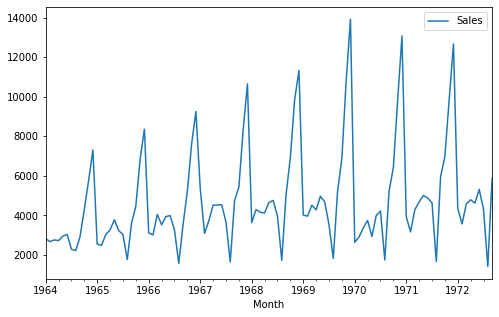

In [14]:
df.plot(figsize=(8,5))

In [15]:
# Testing for stationarity
from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(df['Sales'])
test_result

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [21]:
# differencing
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [23]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [25]:
df.head(20)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [26]:
adfuller(df['Seasonal First Difference'].dropna())

(-7.626619157213163,
 2.060579696813685e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1294.7753384560438)

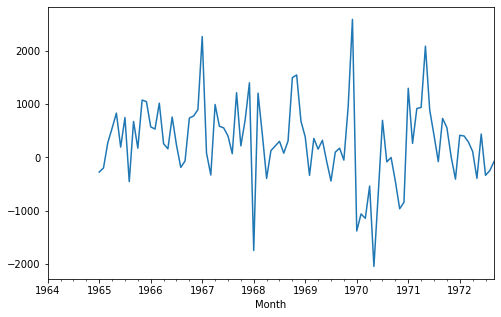

In [28]:
df['Seasonal First Difference'].plot(figsize=(8,5))

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels

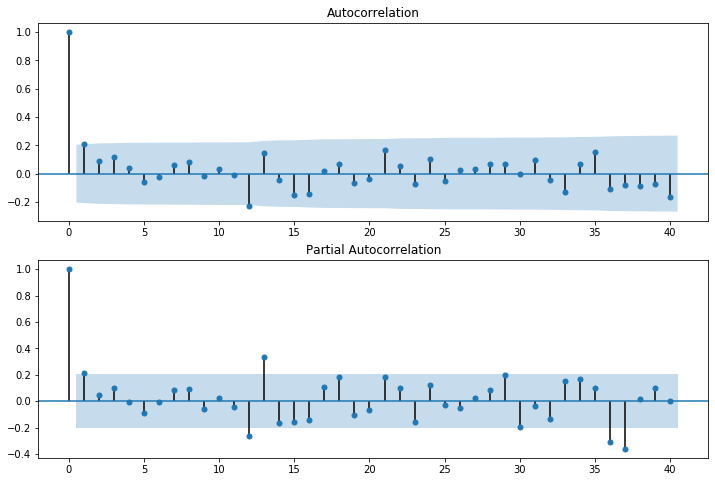

In [35]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)

fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [36]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\diparoy\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\diparoy\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [37]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Fri, 20 Mar 2020   AIC                           1910.251
Time:                        13:42:57   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7829     12.405      1.837      0.069      -1.531      47.097
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

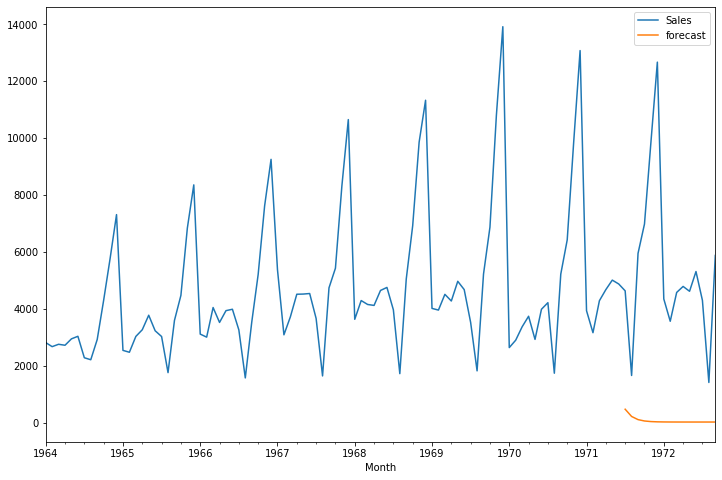

In [48]:
df['forecast']=model_fit.predict(start=90,end=104,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [40]:
import statsmodels.api as sm

In [41]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\diparoy\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


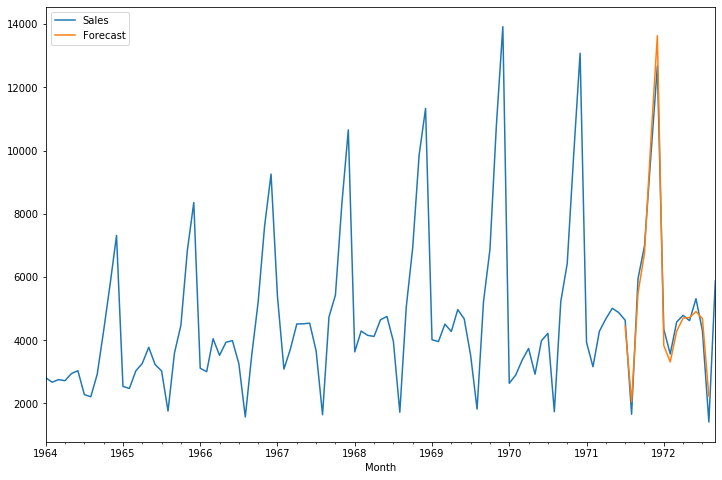

In [49]:
df['Forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','Forecast']].plot(figsize=(12,8))

In [43]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [44]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [45]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [46]:
future_df=pd.concat([df,future_datest_df])

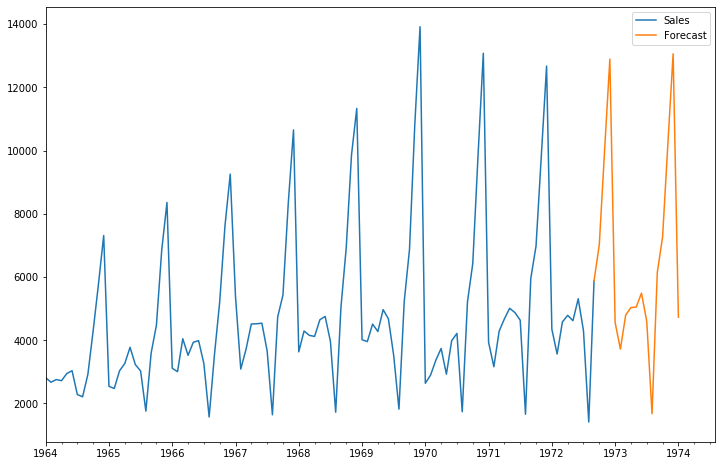

In [50]:
future_df['Forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'Forecast']].plot(figsize=(12, 8)) 